# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Importing relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Creating a browser object that will be used later to go to the mars URL
browser = Browser('chrome')

### Step 1: Visit the Website

In the following code, I will use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). I will then inspect the page to identify which elements to scrape. Specifically, I will utilize the Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visiting the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

In following code, I will create a Beautiful Soup object and use it to scrape the data in the HTML table.

This can also be achieved by using the Pandas `read_html` function. However, I am using Beautiful Soup here to showcase my web scraping skills.

In [4]:
# Creating a Beautiful Soup Object to parse the code
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extracting all rows of data
data_row = soup.find_all('tr', class_='data-row')
data_row

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

In the following code, I will assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Hereâ€™s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Creating an empty list
data_list = []

# Looping through the scraped data to create a list of rows
for data in data_row:
    table_data = data.find_all('td')
    row = [x.text for x in table_data]
    data_list.append(row)
data_list

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [7]:
# Creating a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(data_list, columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])

In [8]:
# Confirming DataFrame was created successfully
mars_df.head(10)

id terrestrial_date sol   ls month min_temp pressure
0    2       2012-08-16  10  155     6    -75.0    739.0
1   13       2012-08-17  11  156     6    -76.0    740.0
2   24       2012-08-18  12  156     6    -76.0    741.0
3   35       2012-08-19  13  157     6    -74.0    732.0
4   46       2012-08-20  14  157     6    -74.0    740.0
5   57       2012-08-21  15  158     6    -78.0    740.0
6   68       2012-08-22  16  158     6    -77.0    740.0
7   79       2012-08-23  17  159     6    -76.0    742.0
8  112       2012-08-27  21  161     6    -74.0    741.0
9  114       2012-08-28  22  162     6    -74.0    742.0

### Step 4: Prepare Data for Analysis

In the following code, I will examine the data types that are currently associated with each column. If necessary, I will cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

In [9]:
# Examining data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                       object
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

In this section, I will analyze my dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question, I will:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question, I will:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question, I will:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
mars_df['month'].value_counts()

4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
Name: month, dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there?
# This section code was developed with assistance from a webpage on note.nkmk.me. The link can be accessed at: https://note.nkmk.me/en/python-pandas-len-shape-size/#:~:text=source%3A%20pandas_len_shape_size.py-,Get%20the%20number%20of%20columns%3A%20len(df.,()%20to%20the%20columns%20attribute.
print(len(mars_df.month))

1867


In [14]:
# 3. What is the average low temperature by month?
mars_df.groupby('month')['min_temp'].mean()

month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64

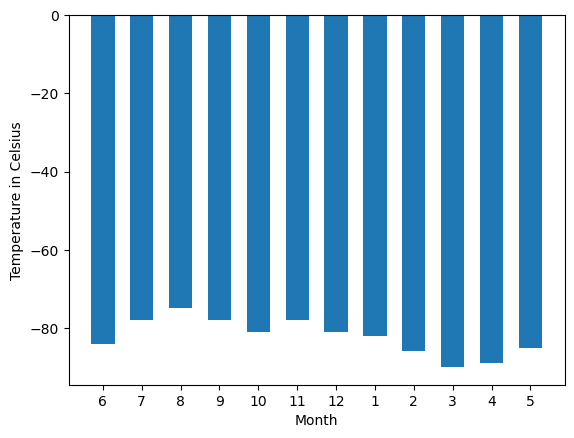

In [15]:
# Plot the average temperature by month
plt.bar(mars_df['month'], mars_df['min_temp'], width=0.6)
plt.rcParams['figure.figsize'] = [12, 6]
plt.ylabel("Temperature in Celsius")
plt.xlabel("Month")
plt.show()

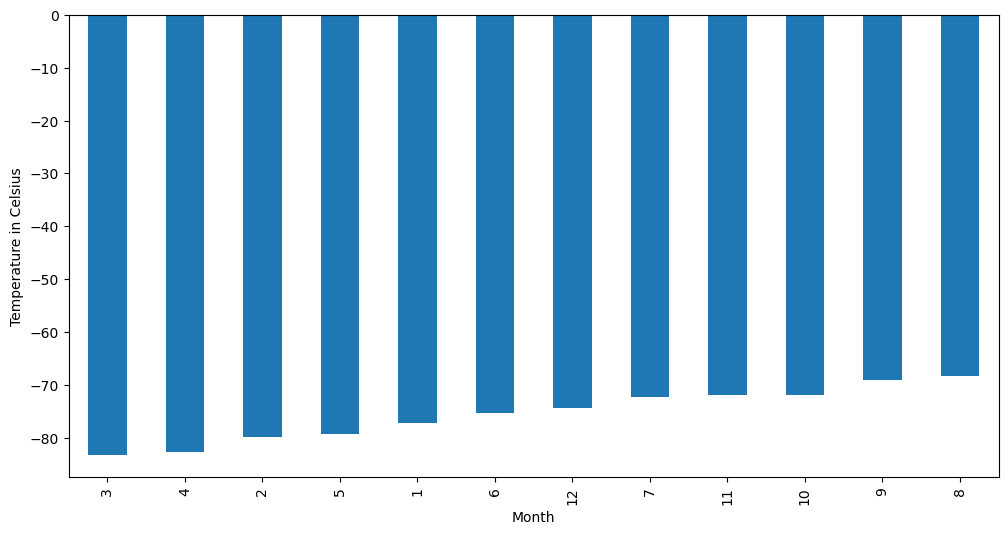

In [16]:
# Identifying the coldest and hottest months in Curiosity's location
grouped_df = mars_df.groupby('month')['min_temp'].mean()
grouped_df.sort_values().plot(kind = 'bar')
plt.ylabel("Temperature in Celsius")
plt.xlabel("Month")
plt.show()

In [21]:
# 4. Average pressure by Martian month
mars_df.groupby('month')['pressure'].mean()

month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64

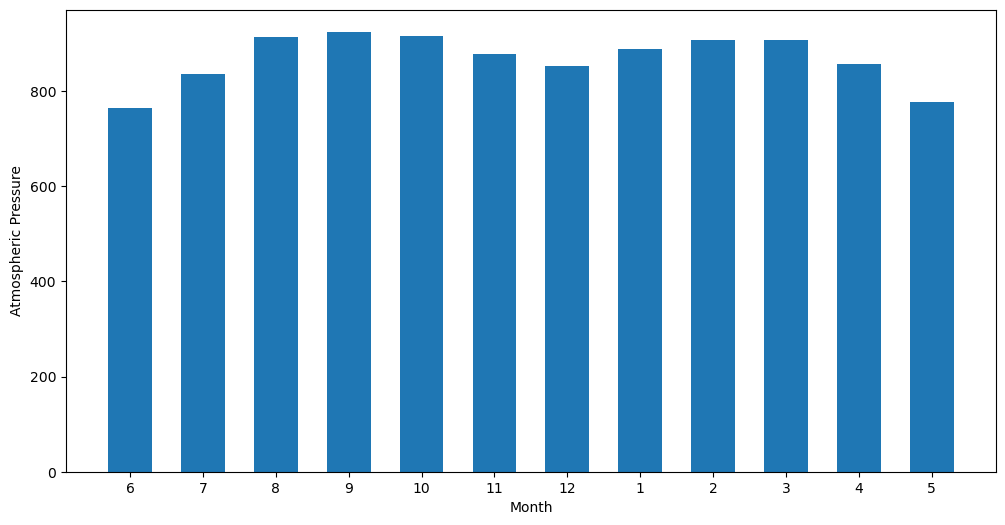

In [22]:
# Plotting the average pressure by month
plt.bar(mars_df['month'], mars_df['pressure'], width=0.6)
plt.ylabel('Atmospheric Pressure')
plt.xlabel('Month')
plt.show()

Text(0.5, 0, 'Number of Days')

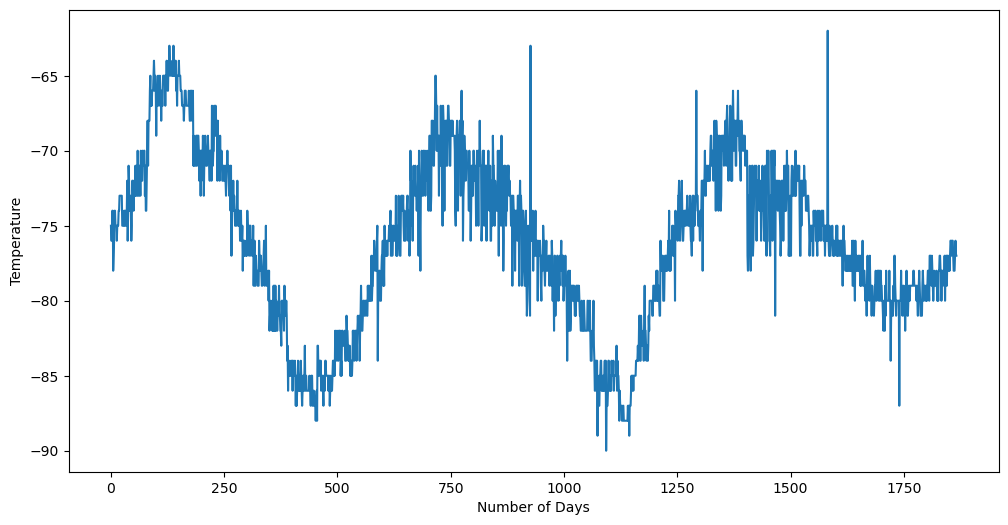

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_df.min_temp.plot()
plt.ylabel('Temperature')
plt.xlabel('Number of Days')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Writing the data to a CSV
mars_data.to_csv()

In [21]:
#Quitting the browser session
browser.quit()